In [139]:
# !pip install nltk
# !pip install wordcloud
# ou 
# !conda install --yes nltk
# !conda install --yes wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [140]:
import nltk

In [85]:
from string import punctuation

In [90]:
import matplotlib.pyplot as plt

In [86]:
from wordcloud import WordCloud

In [192]:
import numpy as np

In [193]:
arquivo = open("./pg55752.txt", "r", encoding="utf-8")

In [110]:
def tratar_linha( linha_texto ):
    pontuacao = punctuation + "\ufeff"
    nova_linha_texto = ""
    for character in linha_texto:
        # print(character, end="")
        if character == "\n":
            character = " "
        if character not in pontuacao:
            nova_linha_texto = nova_linha_texto + character
    return nova_linha_texto

In [111]:
texto = ""
linha_lida = "ALGUMA COISA"
while linha_lida != "":
    linha_lida = arquivo.readline()
    novo_linha = tratar_linha(linha_lida)
    texto = texto + novo_linha

In [112]:
arquivo.close()

In [133]:
stop_words = ['a', 'o', 'de', 'da', 'do', 'ha', 'por', 'dou', 
              'para', 'que', '', 'e', 'das', 'dos', 'as', 'os', 'à',
              'como', 'um', 'uma', 'na', 'eu', 'se', 'ao', 'minha', 
              'não', 'era', 'mas', 'em']

In [164]:
stop_words_pt = nltk.corpus.stopwords.words('portuguese')

In [165]:
stop_words_en = nltk.corpus.stopwords.words('english')

In [178]:
stop_words = stop_words_pt + stop_words_en + \
['à', 'também', 'á', 'ha', 'outro', 'outra', '']

In [179]:
def tratar_tokens( tokens ):
    tokens_tratados = []
    for token in tokens:
        token = token.lower()
        if token not in stop_words:
            tokens_tratados.append(token)
    return tokens_tratados

In [180]:
tokens = texto.split(" ")
tokens_tratados = tratar_tokens(tokens)

In [181]:
dicionario = {}

In [182]:
# {"capitu": 3, "mãe": 251, "mim": 200}
for token in tokens_tratados:
    if token in dicionario:
        dicionario[token] = dicionario[token] + 1
    else:
        dicionario[token] = 1

In [186]:
def srt_algoritmo( x ):
    return x[1]

In [195]:
palavras_ordenadas_frequencia = sorted(dicionario.items(), key=srt_algoritmo)

In [196]:
top_20_palavras = palavras_ordenadas_frequencia[::-1][0:20]

In [198]:
np_top_20_palavras = np.array(top_20_palavras)

In [199]:
palavras = np_top_20_palavras[:, 0]
palavras

array(['capitú', 'elle', 'mãe', 'dias', 'tambem', 'tudo', 'ella', 'casa',
       'olhos', 'mim', 'josé', 'assim', 'vez', 'agora', 'ainda', 'nada',
       'tempo', 'tão', 'disse', 'escobar'], dtype='<U11')

In [205]:
valores = np_top_20_palavras[:, 1].astype(np.int64)
valores

array([343, 238, 227, 191, 189, 187, 184, 169, 165, 162, 159, 158, 148,
       145, 140, 132, 121, 121, 119, 111], dtype=int64)

<BarContainer object of 20 artists>

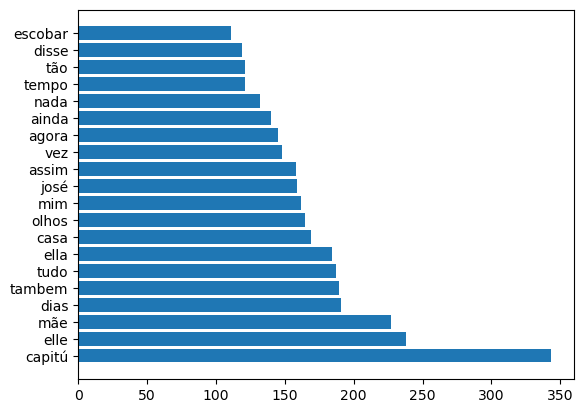

In [207]:
plt.barh(palavras, valores)

In [160]:
novo_texto = ' '.join(tokens_tratados)

In [173]:
wordcloud_gerador = WordCloud(width=800, height=600, collocations=False)
imagem1 = wordcloud_gerador.generate(novo_texto)

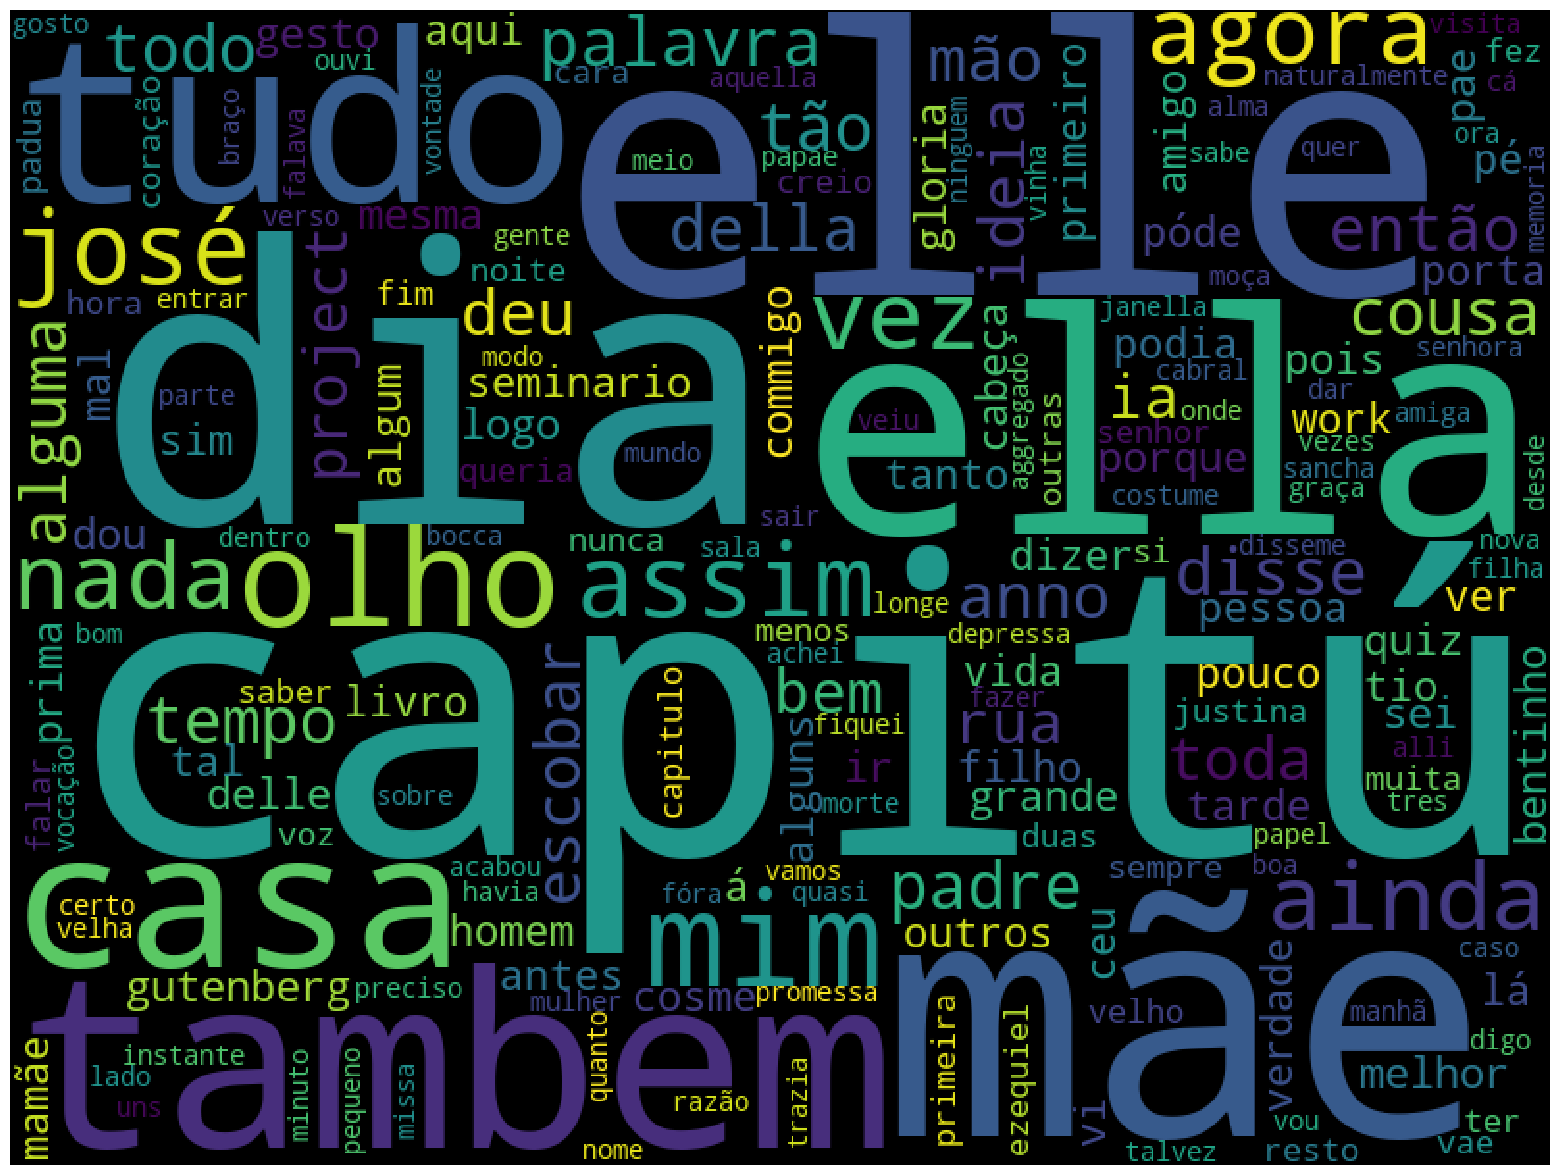

In [174]:
plt.figure(figsize=(20, 15))
plt.imshow(imagem1, interpolation='none')
plt.axis("off")
plt.show()

In [93]:
palavras = texto.split(" ")

In [94]:
len(palavras)

74047

In [95]:
dicionario = list(set(palavras))

In [96]:
len(dicionario)

11213

In [98]:
riqueza_lexical = len(dicionario) / len(palavras)
riqueza_lexical

0.15143084797493483